## The life prediction is trying to know if money makes people happy.

In [1]:
# Importing the necessary libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
import plotly.graph_objs as go
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# Loading the data
Life_satisfaction_df = pd.read_csv(r"Life Statisfaction-2019.csv",thousands=',',
                                   encoding='latin1')

In [3]:
# using .head()
Life_satisfaction_df.head()

Overall rank Country or region  Life Satisfaction Score  \
0             1           Finland                      7.8   
1             2           Denmark                      7.6   
2             3            Norway                      7.6   
3             4           Iceland                      7.5   
4             5       Netherlands                      7.5   

   GDP per capita(USD)  Social support  Healthy life expectancy  \
0               134000           1.587                    0.986   
1               138300           1.573                    0.996   
2               148800           1.582                    1.028   
3               138000           1.624                    1.026   
4               139600           1.522                    0.999   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                         0.596       0.153                      0.393  
1                         0.592       0.252                      0.410  
2                         0.603       0.271                      0.341  
3                         0.591       0.354                      0.118  
4                         0.557       0.322                      0.298

In [4]:
# using .tail()
Life_satisfaction_df.tail()

Overall rank         Country or region  Life Satisfaction Score  \
151           152                    Rwanda                      3.3   
152           153                  Tanzania                      3.2   
153           154               Afghanistan                      3.2   
154           155  Central African Republic                      3.1   
155           156               South Sudan                      2.9   

     GDP per capita(USD)  Social support  Healthy life expectancy  \
151                35900           0.711                    0.614   
152                47600           0.885                    0.499   
153                35000           0.517                    0.361   
154                 2600           0.000                    0.105   
155                30600           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
151                         0.555       0.217                      0.411  
152                         0.417       0.276                      0.147  
153                         0.000       0.158                      0.025  
154                         0.225       0.235                      0.035  
155                         0.010       0.202                      0.091

In [5]:
# using .info()
Life_satisfaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Life Satisfaction Score         156 non-null float64
GDP per capita(USD)             156 non-null int64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 11.1+ KB


In [6]:
Life_satisfaction_df.shape

(156, 9)

In [7]:
# Converting the GDP per capita column to float:
Life_satisfaction_df['GDP per capita(USD)'] = pd.to_numeric(Life_satisfaction_df['GDP per capita(USD)'], downcast='float')

In [11]:
# using .describe()
Life_satisfaction_df.describe()

Overall rank  Life Satisfaction Score  GDP per capita(USD)  \
count    156.000000               156.000000           156.000000   
mean      78.500000                 5.407692         90514.742188   
std       45.177428                 1.111671         39838.949219   
min        1.000000                 2.900000             0.000000   
25%       39.750000                 4.500000         60275.000000   
50%       78.500000                 5.400000         96000.000000   
75%      117.250000                 6.200000        123250.000000   
max      156.000000                 7.800000        168400.000000   

       Social support  Healthy life expectancy  Freedom to make life choices  \
count      156.000000               156.000000                    156.000000   
mean         1.208814                 0.725244                      0.392571   
std          0.299191                 0.242124                      0.143289   
min          0.000000                 0.000000                      0.000000   
25%          1.055750                 0.547750                      0.308000   
50%          1.271500                 0.789000                      0.417000   
75%          1.452500                 0.881750                      0.507250   
max          1.624000                 1.141000                      0.631000   

       Generosity  Perceptions of corruption  
count  156.000000                 156.000000  
mean     0.184846                   0.110603  
std      0.095254                   0.094538  
min      0.000000                   0.000000  
25%      0.108750                   0.047000  
50%      0.177500                   0.085500  
75%      0.248250                   0.141250  
max      0.566000                   0.453000

###  Data Visualization
     Check out Correlations

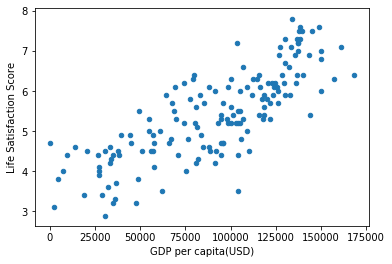

In [12]:
# Visualizing the data:
Life_satisfaction_df.plot(kind='scatter', x="GDP per capita(USD)", y="Life Satisfaction Score")
plt.show()

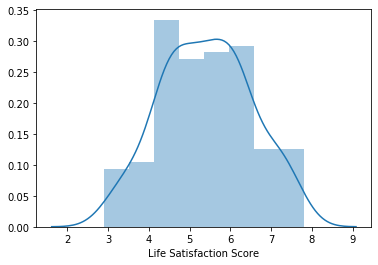

In [13]:
# plotting histogram of the Life satisfaction:
sns.distplot(Life_satisfaction_df['Life Satisfaction Score']);

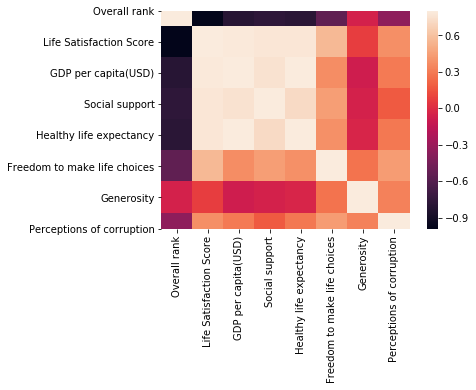

In [14]:
# plotting the correlation matrix 
Satisfation_corr = Life_satisfaction_df.corr()
sns.heatmap(Satisfation_corr, vmax=.8, square=True);

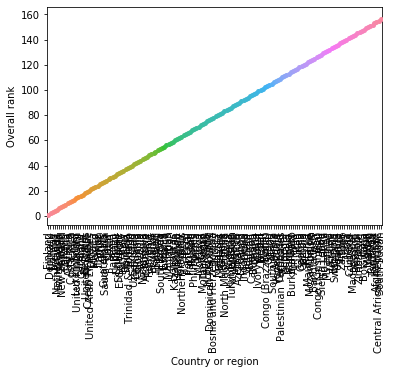

In [15]:
# Investigating Country/regional Life satisfaction ranking
country_region = sns.stripplot(x="Country or region", y="Overall rank", data=Life_satisfaction_df, jitter=True)
plt.xticks(rotation=90);

In [ ]:
# # Investigating the Global life satisfaction ranking:
# data = dict(type = 'choropleth', 
#            locations = Life_satisfaction_df['Country or region'],
#            locationmode = 'country names',
#            rank = Life_satisfaction_df['Overall rank'], 
#            text = Life_satisfaction_df['Country or region'],
#            colorbar = {'title':'Life Satisfaction'})
# layout = dict(title = 'Global Life Satisfaction', 
#              geo = dict(showframe = False, 
#                        projection = {'type': 'Mercator'}))
# choromap3 = go.Figure(data = [data], layout=layout)
# iplot(choromap3)

In [16]:
# selecting the fearures for traning:
features_df = Life_satisfaction_df[["Country or region", "GDP per capita(USD)", "Life Satisfaction Score", 
                                    "Social support", "Healthy life expectancy", "Freedom to make life choices", 
                                    "Perceptions of corruption"]]

features_df

Country or region  GDP per capita(USD)  Life Satisfaction Score  \
0                     Finland             134000.0                      7.8   
1                     Denmark             138300.0                      7.6   
2                      Norway             148800.0                      7.6   
3                     Iceland             138000.0                      7.5   
4                 Netherlands             139600.0                      7.5   
..                        ...                  ...                      ...   
151                    Rwanda              35900.0                      3.3   
152                  Tanzania              47600.0                      3.2   
153               Afghanistan              35000.0                      3.2   
154  Central African Republic               2600.0                      3.1   
155               South Sudan              30600.0                      2.9   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Perceptions of corruption  
0                        0.393  
1                        0.410  
2                        0.341  
3                        0.118  
4                        0.298  
..                         ...  
151                      0.411  
152                      0.147  
153                      0.025  
154                      0.035  
155                      0.091  

[156 rows x 7 columns]

## Model selection: Linear Model to Predict Life satisfaction

In [17]:
# Train and Test selection
x = features_df[["GDP per capita(USD)", "Social support", "Healthy life expectancy", 
                            "Freedom to make life choices", "Perceptions of corruption"]]

y = features_df["Life Satisfaction Score"]


In [18]:
x.head()

GDP per capita(USD)  Social support  Healthy life expectancy  \
0             134000.0           1.587                    0.986   
1             138300.0           1.573                    0.996   
2             148800.0           1.582                    1.028   
3             138000.0           1.624                    1.026   
4             139600.0           1.522                    0.999   

   Freedom to make life choices  Perceptions of corruption  
0                         0.596                      0.393  
1                         0.592                      0.410  
2                         0.603                      0.341  
3                         0.591                      0.118  
4                         0.557                      0.298

In [19]:
y.head()

0    7.8
1    7.6
2    7.6
3    7.5
4    7.5
Name: Life Satisfaction Score, dtype: float64

In [20]:
x.shape

(156, 5)

In [21]:
y.shape

(156,)

In [22]:
# Spliting the x and y dataframe into train and test each:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [23]:
# the structure of the x_train dataframe:
x_train.shape

(109, 5)

In [24]:
# the structure of the x_test dataframe:
x_test.shape

(47, 5)

In [25]:
# structure of the y_test dataframe:
y_test.shape

(47,)

In [26]:
# Selecting the linear model:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()

In [27]:
# Training the model on the train dataset:
l_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Printing the regression coefficients
print('Coefficients: \n', l_model.coef_)

Coefficients: 
 [6.67361884e-06 1.04480028e+00 1.40871667e+00 1.73732774e+00
 7.79737533e-01]


In [29]:
# life satisfaction prediction:
predictions = l_model.predict(x_train)

predictions

array([5.77284212, 4.01898364, 6.23603267, 6.74708613, 5.90495488,
       6.38179809, 6.02169379, 4.91685982, 5.72022483, 5.53874332,
       6.99141569, 6.56963674, 3.75688001, 4.5708673 , 5.53027433,
       4.50487764, 3.45399992, 6.58032702, 6.97523038, 6.11531326,
       4.8031768 , 6.68466063, 3.08829665, 6.96834617, 4.17716522,
       5.2684596 , 5.02518826, 2.36997431, 5.61439966, 5.22692497,
       7.19408647, 5.58436414, 6.77762363, 6.42523291, 5.8179219 ,
       6.10977889, 5.68745165, 4.46807618, 6.12616278, 6.50127684,
       3.34211966, 4.76382478, 6.28041801, 6.09311863, 5.32230383,
       3.8348832 , 4.07837403, 6.16653716, 5.88644211, 5.89252167,
       4.03541995, 6.63733596, 6.31631278, 5.17672647, 3.48435401,
       6.95495609, 5.63393342, 6.38489324, 4.26711023, 4.25833928,
       6.01765463, 5.0876928 , 6.03490276, 5.76174471, 6.97273533,
       7.04082495, 4.50122632, 6.60360355, 5.15087134, 3.72055692,
       6.36872277, 5.94813122, 6.98830666, 3.34691319, 5.06227

In [30]:
# showing the structure of the predictions
predictions.shape

(109,)

In [32]:
# matching the predictions to its predicted countries:
x_train["predicted"] = predictions

x_train

C:\Users\tmmda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


GDP per capita(USD)  Social support  Healthy life expectancy  \
64              96000.0           1.274                    0.854   
98              56900.0           0.808                    0.232   
50             150000.0           1.319                    0.808   
21             130000.0           1.520                    0.999   
22             107000.0           1.323                    0.861   
..                  ...             ...                      ...   
63             126300.0           1.252                    1.042   
70              68500.0           1.328                    0.739   
81             118100.0           1.156                    0.999   
11             103400.0           1.441                    0.963   
95              54900.0           0.910                    0.331   

    Freedom to make life choices  Perceptions of corruption  predicted  
64                         0.455                      0.027   5.772842  
98                         0.352                      0.090   4.018984  
50                         0.493                      0.097   6.236033  
21                         0.564                      0.151   6.747086  
22                         0.433                      0.073   5.904955  
..                           ...                        ...        ...  
63                         0.417                      0.162   6.256152  
70                         0.245                      0.000   5.097843  
81                         0.067                      0.034   5.332682  
11                         0.558                      0.093   6.380666  
95                         0.381                      0.037   4.260725  

[109 rows x 6 columns]

In [34]:
countries = features_df['Country or region']

countries

0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 156, dtype: object

In [36]:
predicted = x_train['predicted']

predicted

64    5.772842
98    4.018984
50    6.236033
21    6.747086
22    5.904955
        ...   
63    6.256152
70    5.097843
81    5.332682
11    6.380666
95    4.260725
Name: predicted, Length: 109, dtype: float64

## Using the k-Nearest Neighbors regression model to predict

In [ ]:
# Importing the sklearn.neighbors model
KNeighbors_model = sklearn.linear_model.LinearRegression()

In [ ]:
# Importing the sklearn.neighbors
import sklearn.neighbors
KNeighbors_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [ ]:
# fitting the train data to the model:
KNeighbors_model.fit(x_train, y_train)

In [ ]:
# predicting with the K-Nearest Neighbors:
KNN_predictions = KNeighbors_model.predict(x_train)

KNN_predictions